In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

logfile = '/home/ubuntu/logs/trpo/pendulum/32_32_32/progress.csv'

prog =pd.read_csv(logfile)#.dropna()

prog

,MAEpLen,MAEpRet,MeanStepRew,Q,VQDiff,meankl,surr_gain,vpreds
0,NaN,NaN,0.171014,7.349719,76.576836,0.0,-1.396984e-08,0.034270
1,0.0,-0.028054,0.121564,5.163147,42.313946,0.0,8.102506e-08,0.033363
2,0.0,0.084344,0.139511,6.224577,54.111570,0.0,9.126961e-08,0.046584
3,0.0,0.159789,0.168077,7.800280,85.266884,0.0,-1.024455e-07,0.045261
4,0.0,0.153839,0.107854,4.811955,29.872253,0.0,-7.078052e-08,0.086582
...,...,...,...,...,...,...,...,...
946,0.0,-0.174656,0.173167,6.614803,22.654318,0.0,8.381903e-09,5.674854
947,0.0,0.450307,0.142830,6.056459,7.829972,0.0,3.352761e-08,5.761609
948,0.0,0.316584,0.166125,6.601321,15.734060,0.0,1.769513e-08,5.242893
949,0.0,-0.122987,0.128298,5.515612,9.661686,0.0,-2.142042e-08,5.439028


MAEpLen


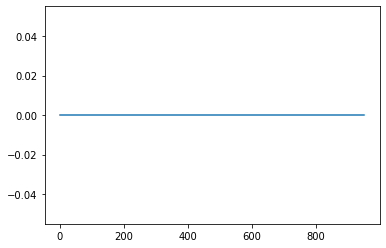

MAEpRet


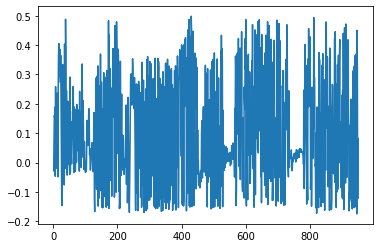

MeanStepRew


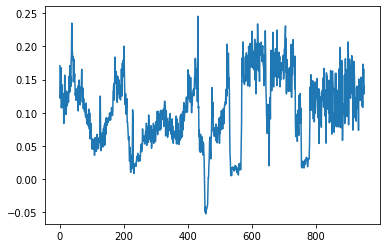

Q


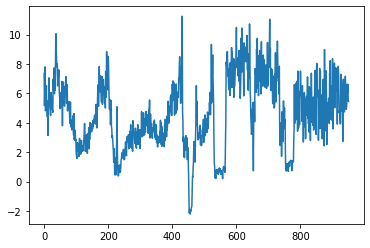

VQDiff


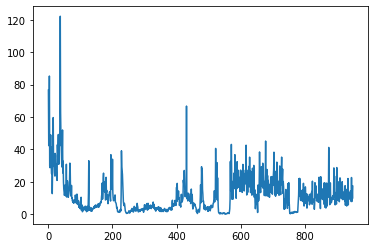

meankl


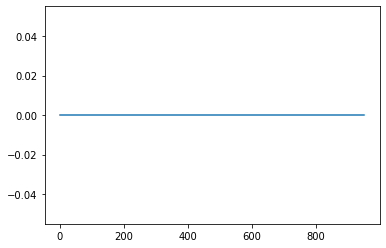

surr_gain


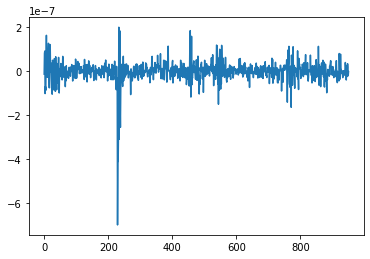

vpreds


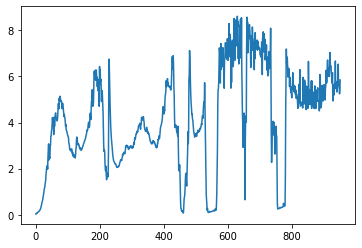

In [2]:
for c in prog.columns:
    print(c)
    plt.plot(prog[c])
    plt.show()

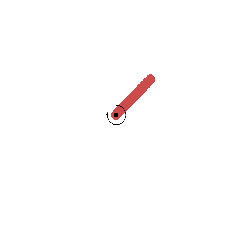

total reward:  -4798.747392160349
avg reward:  -4.798747392160348


<Figure size 432x288 with 0 Axes>

In [7]:

env = gym.make('Pendulum-v0')
ob_space = env.observation_space
ac_space = env.action_space

pi = PolicyWithValue(ob_space=ob_space, 
    ac_space=ac_space, hidden_layers=[16, 16], 
                     activation=torch.nn.ReLU)

pi.load_ckpt('/home/ubuntu/log/trpo/pendulum/16_16')
look_at_the_agent(env, pi, 1000)

In [5]:
import gym

env = gym.make('CartPole-v0')
ac = env.action_space

print(type(ac))

<class 'gym.spaces.discrete.Discrete'>


In [6]:
isinstance(ac, gym.spaces.Discrete)

True

In [42]:
p = gym.make('Pendulum-v0')
pac = p.action_space
print(type(pac))

<class 'gym.spaces.box.Box'>


In [44]:
type(pac) is gym.spaces.Box

True

In [32]:
ac.sample()

0

In [41]:
from torch.distributions import Categorical
import torch

p = torch.tensor([[0.5, 0.5]])

m = Categorical(p)

m.sample()

tensor([1])

In [17]:
pac.shape

(1,)

In [21]:
np.prod((1,)).item()

1

In [13]:
help(gym.spaces.Box)

Help on class Box in module gym.spaces.box:

class Box(gym.spaces.space.Space)
 |  A (possibly unbounded) box in R^n. Specifically, a Box represents the
 |  Cartesian product of n closed intervals. Each interval has the form of one
 |  of [a, b], (-oo, b], [a, oo), or (-oo, oo).
 |  
 |  There are two common use cases:
 |  
 |  * Identical bound for each dimension::
 |      >>> Box(low=-1.0, high=2.0, shape=(3, 4), dtype=np.float32)
 |      Box(3, 4)
 |      
 |  * Independent bound for each dimension::
 |      >>> Box(low=np.array([-1.0, -2.0]), high=np.array([2.0, 4.0]), dtype=np.float32)
 |      Box(2,)
 |  
 |  Method resolution order:
 |      Box
 |      gym.spaces.space.Space
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, low, high, shape=None, dtype=<class 'numpy.float32'>)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self